In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.chdir('E:/')
#os.getcwd()
td= pd.read_excel('Data_Train.xlsx')   # td -> training data or data train
td.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
td.shape #we have 12 columns and 6019 rows in our dataset

(6019, 12)

In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [ ]:
td.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
td.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
td.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [ ]:
td.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

# Treating Null Values

In [ ]:
td.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
k1=td.Mileage.str.split(" ", expand = True)
td['Mileage'] = pd.to_numeric(k1[0], errors='coerce')

td[td.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [ ]:
td['Mileage'].value_counts(dropna=False)
#18.9 and 17.0 have maximum appearance so we can substitute NaN values with anyone of them to avoid later issues

17.00    173
18.90    172
18.60    119
20.36     88
21.10     87
        ... 
9.70       1
13.29      1
12.97      1
23.01      1
14.45      1
Name: Mileage, Length: 431, dtype: int64

In [ ]:
td['Mileage'].fillna(value=td.Mileage.mean(),inplace=True)
td.Mileage.isnull().sum() #no null value is present now in Mileage column

0

In [ ]:
td.groupby('Seats').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Seats,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,1,1
2.0,13,8,10,14,2,2,3,11,10,9,1,15
4.0,51,11,17,87,3,2,3,33,20,29,1,81
5.0,1507,11,22,2622,5,2,4,368,112,305,1,1161
6.0,23,9,13,29,2,2,3,8,6,9,1,30
7.0,201,11,15,456,3,2,4,80,45,80,1,390
8.0,56,11,17,114,2,2,4,21,16,20,1,97
9.0,3,3,3,3,1,1,1,3,3,3,1,3
10.0,5,4,4,5,1,1,3,4,3,4,1,4


In [ ]:
td['Seats'].mode()  # we can replace NaN values with this mode

0    5.0
dtype: float64

In [ ]:
td["Seats"].fillna(value =5.0, inplace=True)
td.Seats.isnull().sum() # now no null value is present in Seats column

0

In [ ]:
k2=td.Engine.str.split(" ", expand = True)
td['Engine'] = pd.to_numeric(k2[0], errors='coerce')

td['Engine'].fillna(value =td.Engine.mean(), inplace = True)
td.Engine.isna().sum() #now no null value is present in Engine column

0

In [ ]:
k3= td.Power.str.split(" ", expand = True)
td['Power'] = pd.to_numeric(k3[0], errors='coerce')

In [ ]:
td['Power'].fillna(value=td.Power.mean(), inplace=True)
td.Power.isna().sum() # now no null value is present in Power column

0

####  Now no null value is present in the dataset.

In [ ]:
td.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
td.Seats= td.Seats.astype(int)
td.Seats.dtypes

dtype('int32')

####  Mileage, Engine, Power are completely numeric for furthur analysis.

### We also divide the 'Name' column as 'Brand Name' .

In [ ]:
td['Brand name'] = td.Name.str.split(' ', expand = True)[0]
td=td.drop('Name',axis=1)

In [ ]:
td=pd.concat([td.drop('Price',axis=1),td.Price],axis=1)
td.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand name,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,Maruti,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,Hyundai,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,Honda,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,Maruti,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,Audi,17.74


# Data Visualization

### 1. Univariate Analysis of variables

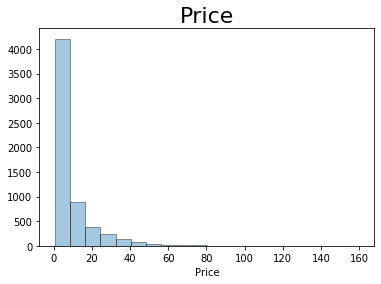

In [ ]:
plt.title('Price',size='22')
sns.distplot(td['Price'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
plt.show()

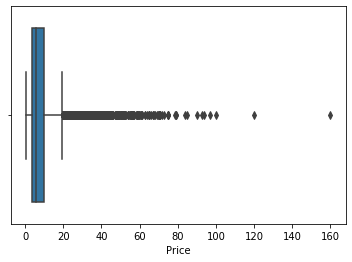

In [ ]:
sns.boxplot(td['Price'])
plt.show()   # there sure exist many outliers we will process them later

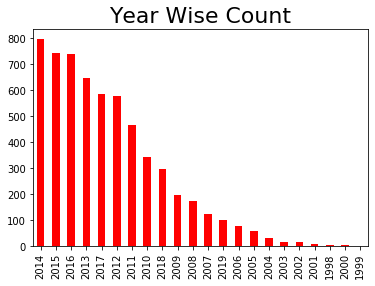

In [ ]:
plt.title('Year Wise Count',fontsize='22')
td['Year'].value_counts().plot(kind='bar',color='red') # most of the cars are bought in year 2014 and in 1999 it is least.
plt.show()

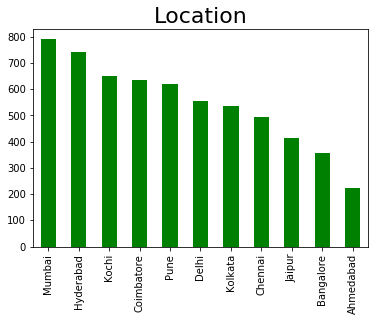

In [ ]:
plt.title('Location',fontsize='22')
td['Location'].value_counts().plot(kind='bar',color='green') # most of the cars are from Mumbai
plt.show()

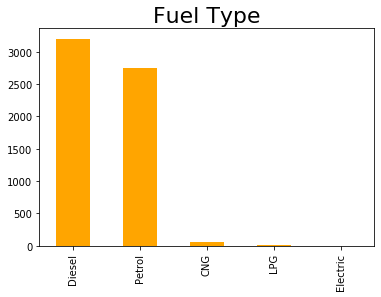

In [ ]:
plt.title('Fuel Type',fontsize='22')
td['Fuel_Type'].value_counts().plot(kind='bar',color='orange') # diesel cars are highest and petrol second highest.
plt.show()

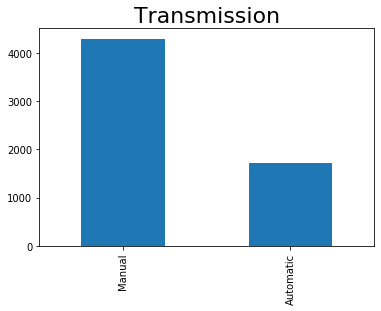

In [ ]:
plt.title('Transmission',fontsize='22')
td['Transmission'].value_counts().plot(kind='bar') # manual transmision is more than automatic
plt.show()

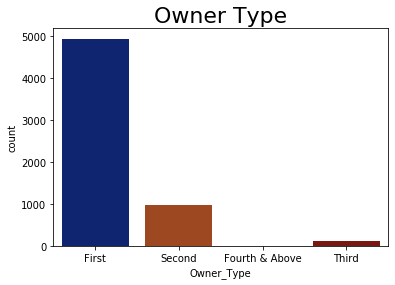

In [ ]:
plt.title('Owner Type',fontsize='22')
sns.countplot(x='Owner_Type', data=td,palette='dark')  # first hand cars are mamimum
plt.show()

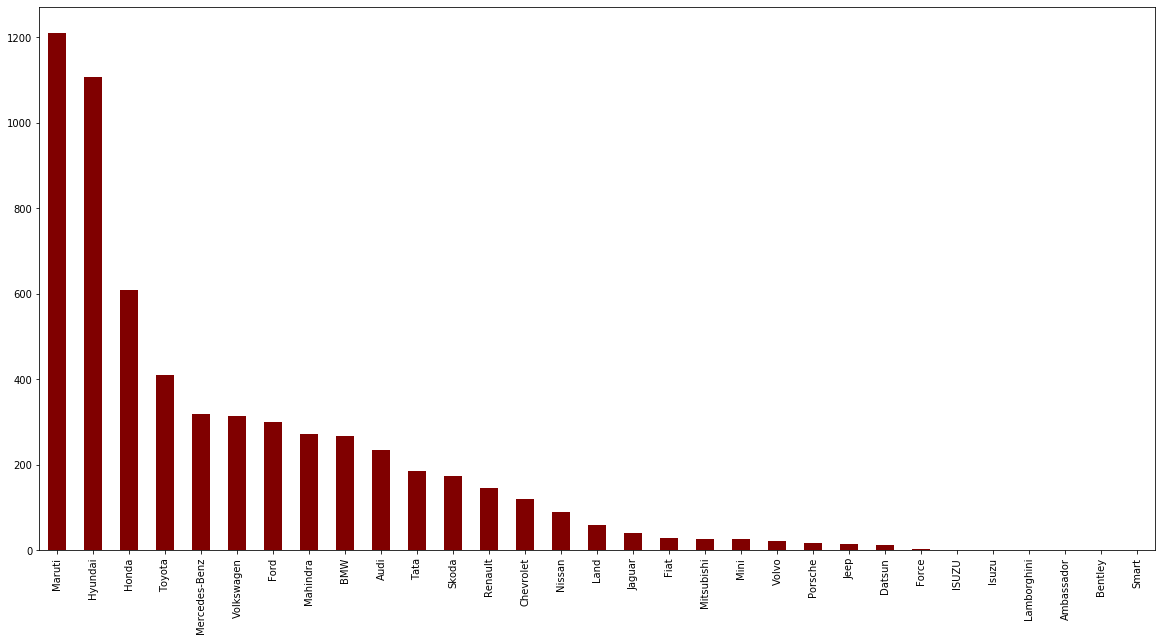

In [ ]:
plt.figure(figsize=(20, 10))
td['Brand name'].value_counts().plot(kind='bar',color='maroon')  # Maruti is the most preferred Brand/Company
plt.show()

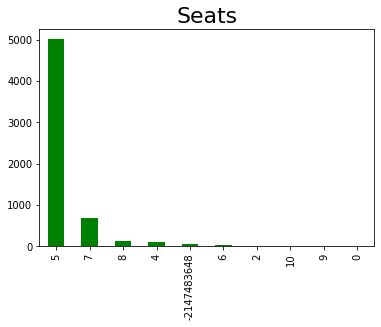

In [ ]:
plt.title('Seats',fontsize='22')
td['Seats'].value_counts().plot(kind='bar',color='green')  # maximum cars are 5 seaters
plt.show()

### 2. Bivariate Analysis of Variables

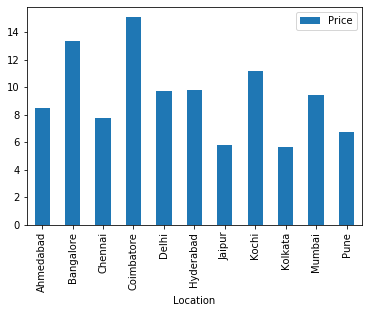

In [ ]:
x = pd.DataFrame(td.groupby('Location')['Price'].mean())
x.plot.bar()
plt.show() #  mean Price of cars sold in coimbatore and bangalore is high.

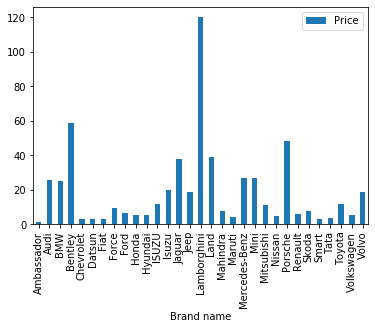

In [ ]:
x = pd.DataFrame(td.groupby('Brand name')['Price'].mean())
x.plot.bar()
plt.show()  # price of Lamborghini is highest

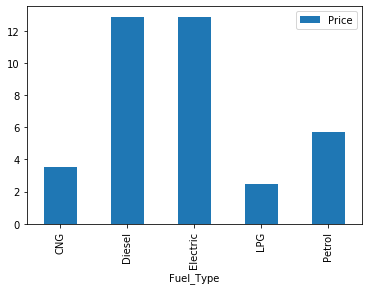

In [ ]:
x = pd.DataFrame(td.groupby('Fuel_Type')['Price'].mean())
x.plot.bar()
plt.show()  # mean price of Diesel cars and Electric cars is same

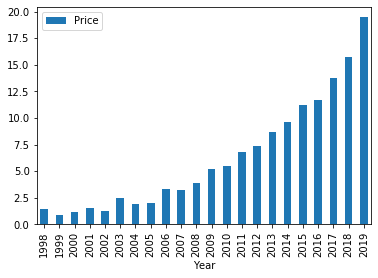

In [ ]:
x = pd.DataFrame(td.groupby('Year')['Price'].mean())
x.plot.bar()
plt.show() # mean price of 2019 cars is highest

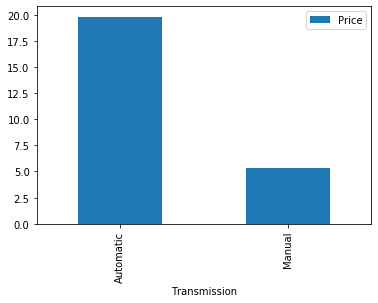

In [ ]:
x = pd.DataFrame(td.groupby('Transmission')['Price'].mean())
x.plot.bar()
plt.show() # Automatic cars have cost more.

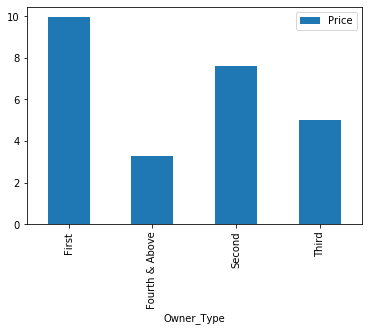

In [ ]:
x = pd.DataFrame(td.groupby('Owner_Type')['Price'].mean())
x.plot.bar()
plt.show() # mean price of first-hand cars is highest.

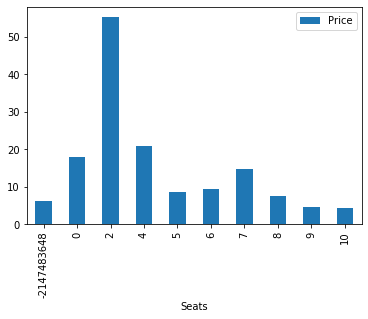

In [ ]:
x = pd.DataFrame(td.groupby('Seats')['Price'].mean())
x.plot.bar()
plt.show()  # 2 seater cars are costliest.

### Using One-Hot encoding/label encoding, we convert categorical variables into numerical to proceed easily.

In [ ]:
Location = td['Location']  # for location
Location = pd.get_dummies(Location,prefix = 'Location',prefix_sep='_',drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [ ]:
Fuel_Type = td['Fuel_Type'] # for Fuel type
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True,prefix = 'FT',prefix_sep='_')
Fuel_Type.head()

,FT_Diesel,FT_Electric,FT_LPG,FT_Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [ ]:
Transmission = td['Transmission']  # for transmissioin
Transmission = pd.get_dummies(Transmission,drop_first=True,prefix = 'Trm',prefix_sep='_')
Transmission.head()

,Trm_Manual
0,1
1,1
2,1
3,1
4,0


In [ ]:
BN=td['Brand name']
BN=pd.get_dummies(BN,drop_first=True,prefix='Bn',prefix_sep='_')
BN.head()

,Bn_Audi,Bn_BMW,Bn_Bentley,Bn_Chevrolet,Bn_Datsun,Bn_Fiat,Bn_Force,Bn_Ford,Bn_Honda,Bn_Hyundai,...,Bn_Mitsubishi,Bn_Nissan,Bn_Porsche,Bn_Renault,Bn_Skoda,Bn_Smart,Bn_Tata,Bn_Toyota,Bn_Volkswagen,Bn_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
td.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
sp=td.drop('Price',axis=1)
td=pd.concat([sp,Location,Fuel_Type,Transmission,td.Price], axis=1)
td.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,FT_Diesel,FT_Electric,FT_LPG,FT_Petrol,Trm_Manual,Price
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5,...,0,0,1,0,0,0,0,0,1,1.75
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5,...,0,0,0,1,1,0,0,0,1,12.50
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5,...,0,0,0,0,0,0,0,1,1,4.50
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7,...,0,0,0,0,1,0,0,0,1,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5,...,0,0,0,0,1,0,0,0,0,17.74


In [ ]:
td=td.drop(['Location','Fuel_Type','Transmission'],axis=1)
td.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Brand name,Location_Bangalore,Location_Chennai,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,FT_Diesel,FT_Electric,FT_LPG,FT_Petrol,Trm_Manual,Price
0,2010,72000,1,26.60,998.0,58.16,5,Maruti,0,0,...,0,0,1,0,0,0,0,0,1,1.75
1,2015,41000,1,19.67,1582.0,126.20,5,Hyundai,0,0,...,0,0,0,1,1,0,0,0,1,12.50
2,2011,46000,1,18.20,1199.0,88.70,5,Honda,0,1,...,0,0,0,0,0,0,0,1,1,4.50
3,2012,87000,1,20.77,1248.0,88.76,7,Maruti,0,1,...,0,0,0,0,1,0,0,0,1,6.00
4,2013,40670,2,15.20,1968.0,140.80,5,Audi,0,0,...,0,0,0,0,1,0,0,0,0,17.74


# Analysing and treating outliers

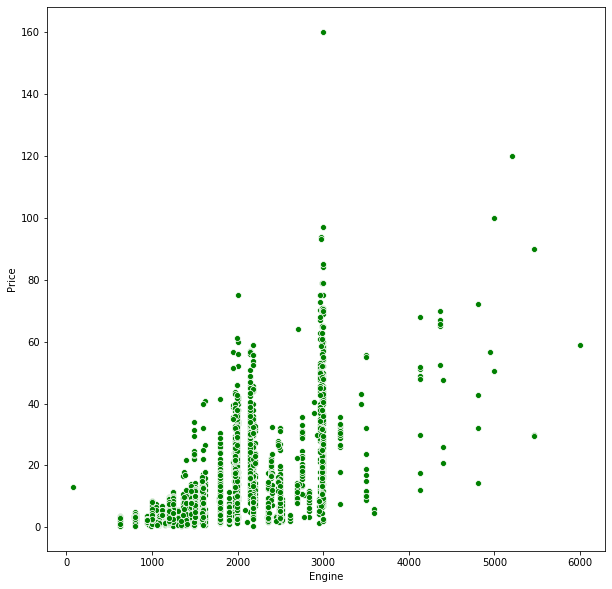

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Engine", y="Price", data=td,color='green')
plt.show() # no outliers

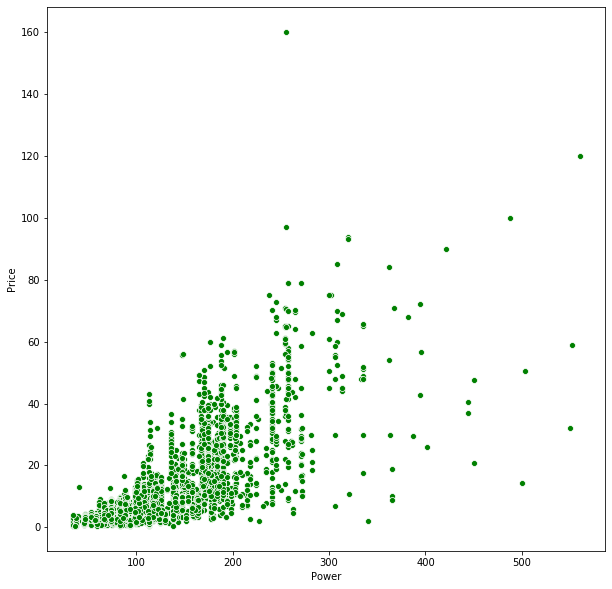

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Power", y="Price", data=td,color='green')
plt.show() #no outliers

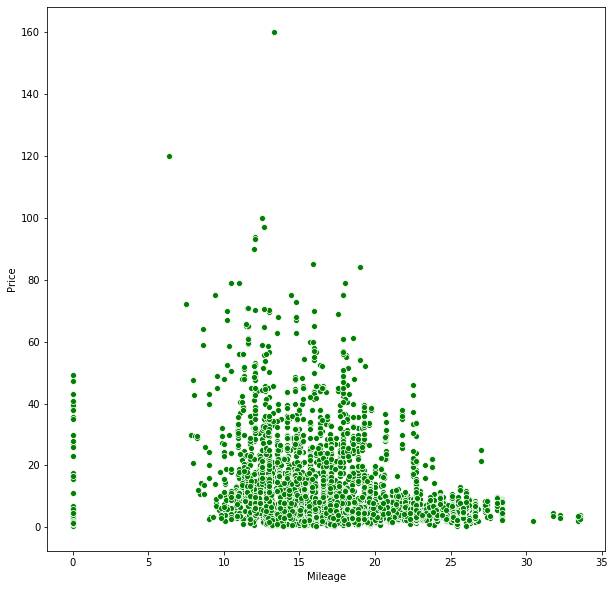

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Mileage", y="Price", data=td,color='green')
plt.show() # no outliers

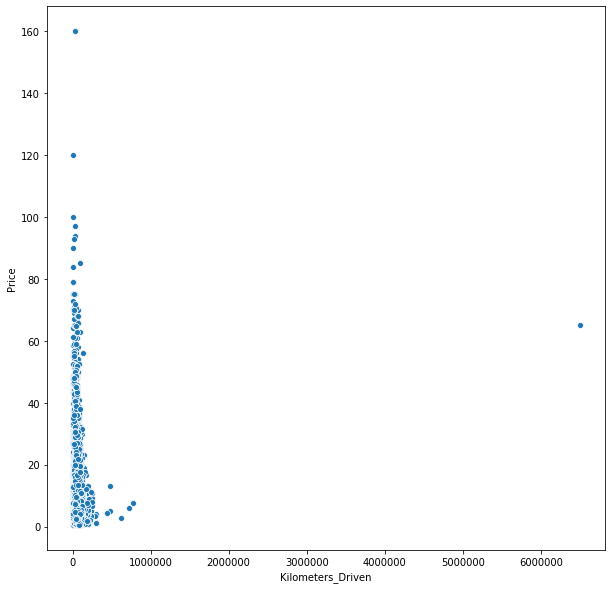

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Kilometers_Driven", y="Price", data=td)
plt.show()
# Here there is an outlier present (a point in kilometer_driven is outlier)

In [ ]:
td.drop(td[td['Kilometers_Driven'] >= 6000000].index, axis=0, inplace=True) # outlier is removed
td.shape

(6018, 24)

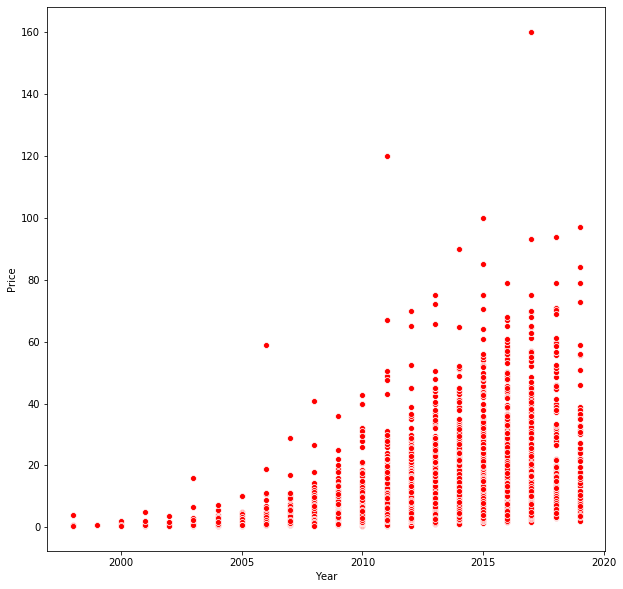

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Year", y="Price", data=td,color='red')
plt.show()
# cars of before year 2000 are outlier

In [ ]:
td.drop(td[td['Year'] <= 2000].index, axis=0, inplace=True) # outlier is removed
td.shape

(6008, 24)

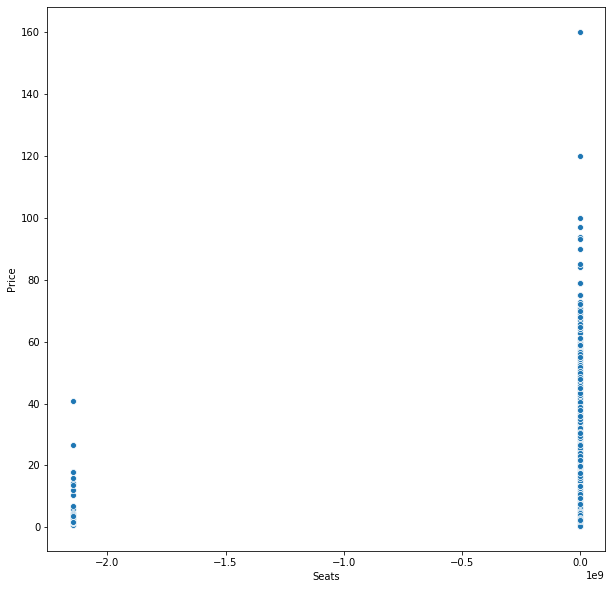

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Seats", y="Price", data=td)
plt.show() # cars with <2 seats are outliers

In [ ]:
td.drop(td[td['Seats'] <= 2].index, axis=0, inplace=True) # outlier is removed
td.shape

(5949, 24)

In [ ]:
td=td.reset_index(drop=True)

In [ ]:
td.tail()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Brand name,Location_Bangalore,Location_Chennai,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,FT_Diesel,FT_Electric,FT_LPG,FT_Petrol,Trm_Manual,Price
5944,2014,27365,1,28.40,1248.0,74.0,5,Maruti,0,0,...,0,0,0,0,1,0,0,0,1,4.75
5945,2015,100000,1,24.40,1120.0,71.0,5,Hyundai,0,0,...,0,0,0,0,1,0,0,0,1,4.00
5946,2012,55000,2,14.00,2498.0,112.0,8,Mahindra,0,0,...,0,0,0,0,1,0,0,0,1,2.90
5947,2013,46000,1,18.90,998.0,67.1,5,Maruti,0,0,...,0,1,0,0,0,0,0,1,1,2.65
5948,2011,47000,1,25.44,936.0,57.6,5,Chevrolet,0,0,...,0,0,0,0,1,0,0,0,1,2.50


### Now our Data is Outlier free.

#### Let's try Scaling the Kilometers Driven.

# Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
x=td.loc[:,['Kilometers_Driven']].values
scaler=MinMaxScaler()
scaler.fit(x)
td.Kilometers_Driven=scaler.transform(x)
td.Kilometers_Driven

0       0.092703
1       0.052694
2       0.059147
3       0.112062
4       0.052268
          ...   
5944    0.035097
5945    0.128840
5946    0.070763
5947    0.059147
5948    0.060438
Name: Kilometers_Driven, Length: 5949, dtype: float64

### Corelation Matrix

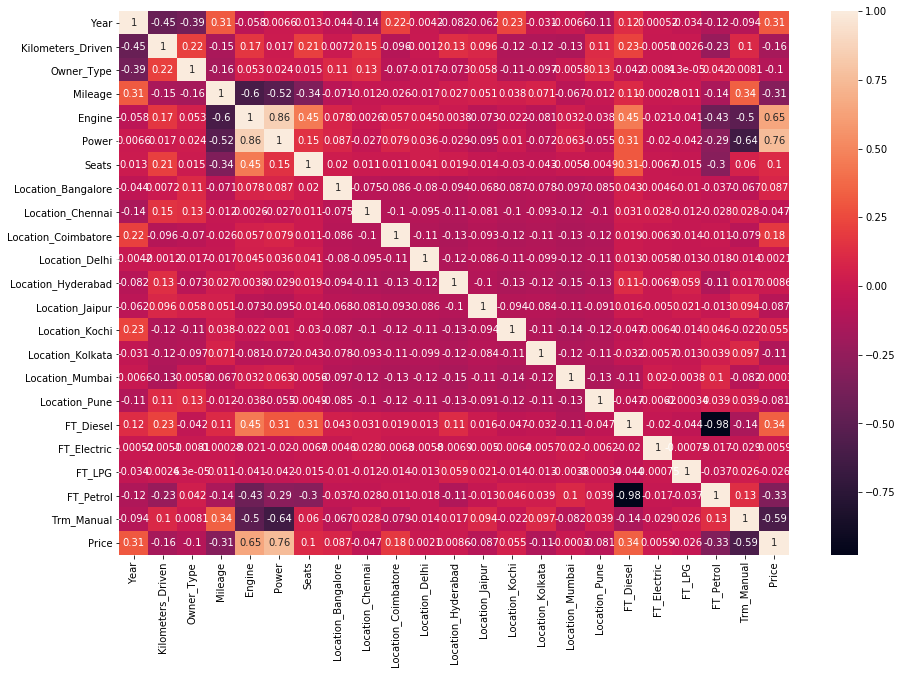

In [ ]:
df=td.drop('Brand name',axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## ML Model - Training

### 1. Train/Test Split of Data

In [ ]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df.Price
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### 2. Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
p=LinearRegression()
p.fit(x_train,y_train)
y_h=p.predict(x_test)

print('Train set acc:',p.score(x_train,y_train),'\nTest set acc:',p.score(x_test,y_test))
y_h

Train set acc: 0.6980644075733773 
Test set acc: 0.745350286795738


array([17.05895996, -4.38490184, -0.45565857, ...,  4.02010597,
       26.74772359, 17.82714787])

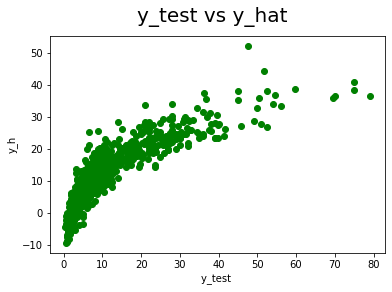

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_h,color='green')
fig.suptitle('y_test vs y_hat', fontsize=20)
plt.xlabel('y_test ')
plt.ylabel('y_h')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

test_set_rmse = (np.sqrt(mean_squared_error(y_test.values, y_h)))

test_set_r2 = r2_score(y_test.values, y_h)

print('RMSE value:',test_set_rmse,'\nR2 score:',test_set_r2)

RMSE value: 5.0891638970295086 
R2 score: 0.745350286795738


### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
y_h= rf.predict(x_test)

print('Train set acc:',rf.score(x_train,y_train),'\nTest set acc:',rf.score(x_test,y_test))
y_h

Train set acc: 0.9836256447706575 
Test set acc: 0.9313340255642975


array([12.0237,  1.8193,  1.793 , ...,  3.0074, 51.2968, 18.2153])

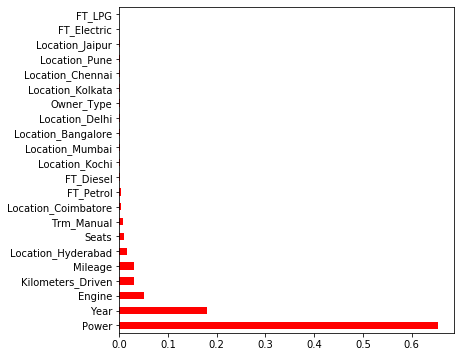

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6),color='red')
plt.show()

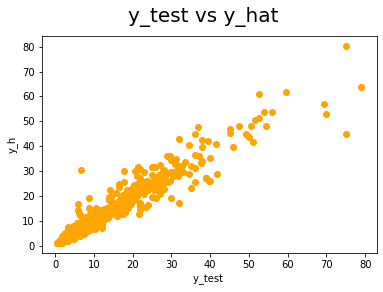

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_h,color='orange')
fig.suptitle('y_test vs y_hat', fontsize=20)
plt.xlabel('y_test ')
plt.ylabel('y_h')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

test_set_rmse = (np.sqrt(mean_squared_error(y_test.values, y_h)))

test_set_r2 = r2_score(y_test.values, y_h)

print('RMSE value:',test_set_rmse,'\nR2 score:',test_set_r2)

RMSE value: 2.64268643609729 
R2 score: 0.9313340255642976


### 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
y_h=decision_tree.predict(x_test)

print('Train set acc:',decision_tree.score(x_train,y_train),'\nTest set acc:',decision_tree.score(x_test,y_test))
y_h

Train set acc: 0.9999991732454137 
Test set acc: 0.8660673999279523


array([11.88,  1.8 ,  1.85, ...,  2.8 , 53.83, 14.7 ])

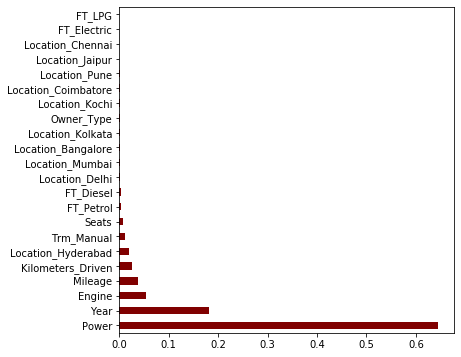

In [ ]:
feat_importances = pd.Series(decision_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6),color='maroon')
plt.show()

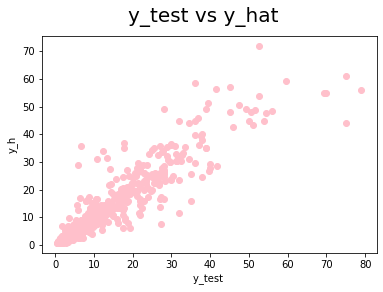

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_h,color='pink')
fig.suptitle('y_test vs y_hat', fontsize=20)
plt.xlabel('y_test ')
plt.ylabel('y_h')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

test_set_rmse = (np.sqrt(mean_squared_error(y_test.values, y_h)))

test_set_r2 = r2_score(y_test.values, y_h)

print('RMSE value:',test_set_rmse,'\nR2 score:',test_set_r2)

RMSE value: 3.6907785837979836 
R2 score: 0.8660673999279523
